In [1]:
# remove everything from the environment
rm(list=ls())
install.packages("Quandl")
library(Quandl)
library(tidyverse)
install.packages("alfred")
library(alfred)

package 'Quandl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


Warning message:
"package 'Quandl' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::first()  masks xts::first()
x dplyr::lag()    masks stats::lag()
x dplyr::la

package 'alfred' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


Warning message:
"package 'alfred' was built under R version 3.6.3"

In [2]:
wti = as_tibble(get_fred_series("DCOILWTICO", "WTI", observation_start="2000-01-02"))
brent = as_tibble(get_fred_series("DCOILBRENTEU", "Brent", observation_start="2000-01-02"))
hh = as_tibble(get_fred_series("MHHNGSP", 'HenryHub', observation_start="2000-01-02"))

Warning message in get_fred_series("DCOILWTICO", "WTI", observation_start = "2000-01-02"):
"NAs introduced by coercion"Warning message in get_fred_series("DCOILBRENTEU", "Brent", observation_start = "2000-01-02"):
"NAs introduced by coercion"

In [3]:
oil_prices = wti %>% left_join(brent, by="date")
prices = hh %>% left_join(oil_prices, by="date")
head(prices)

date,HenryHub,WTI,Brent
2000-02-01,2.66,28.28,27.35
2000-03-01,2.79,31.71,29.78
2000-04-01,3.04,NA,NA
2000-05-01,3.59,25.84,NA
2000-06-01,4.29,30.19,29.69
2000-07-01,3.99,NA,NA


In [4]:
prices

date,HenryHub,WTI,Brent
2000-02-01,2.66,28.28,27.35
2000-03-01,2.79,31.71,29.78
2000-04-01,3.04,NA,NA
2000-05-01,3.59,25.84,NA
2000-06-01,4.29,30.19,29.69
2000-07-01,3.99,NA,NA
2000-08-01,4.43,27.85,25.24
2000-09-01,5.06,33.42,35.09
2000-10-01,5.02,NA,NA
2000-11-01,5.52,33.14,31.62


In [4]:
# identify count of NAs in data frame
sum(is.na(prices))
colSums(is.na(prices))

[1] 180

date HenryHub      WTI    Brent 
       0        0       90       90

In [5]:
install.packages("VIM")
library(VIM)
install.packages('mice')
#Loading the mice package
library(mice)

#Loading the following package for looking at the missing values
install.packages('lattice')
library(lattice)



  There is a binary version available but the source version is later:
    binary source needs_compilation
VIM  5.1.1  6.0.0              TRUE

  Binaries will be installed
package 'VIM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

The following objects are masked from 'package:xts':

    first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind



package 'lattice' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lattice'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Sarit\anaconda3\envs\R\Lib\R\library\00LOCK\lattice\libs\x64\lattice.dll to C:\Users\Sarit\anaconda3\envs\R\Lib\R\library\lattice\libs\x64\lattice.dll: Permission denied"Warning message:
"restored 'lattice'"


The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


In [6]:
# First look at the data
str(prices)

Classes 'tbl_df', 'tbl' and 'data.frame':	248 obs. of  4 variables:
 $ date    : Date, format: "2000-02-01" "2000-03-01" ...
 $ HenryHub: num  2.66 2.79 3.04 3.59 4.29 3.99 4.43 5.06 5.02 5.52 ...
 $ WTI     : num  28.3 31.7 NA 25.8 30.2 ...
 $ Brent   : num  27.4 29.8 NA NA 29.7 ...


,date,HenryHub,WTI,Brent,
157,1,1,1,1,0
1,1,1,1,0,1
1,1,1,0,1,1
89,1,1,0,0,2
,0,0,90,90,180


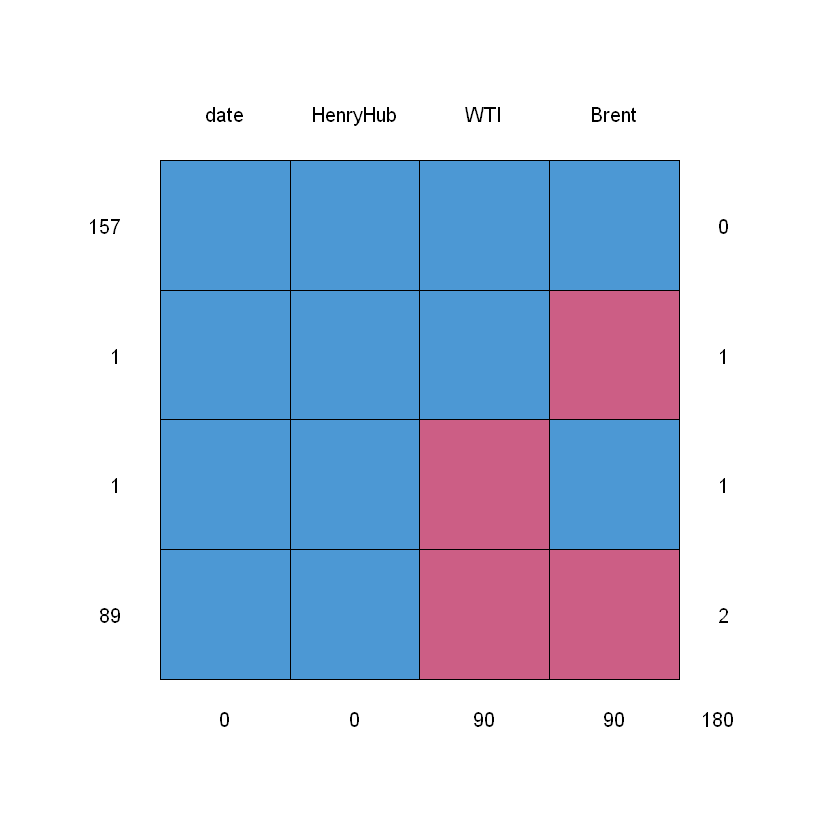

In [7]:
#understand the missing value pattern
md.pattern(prices)

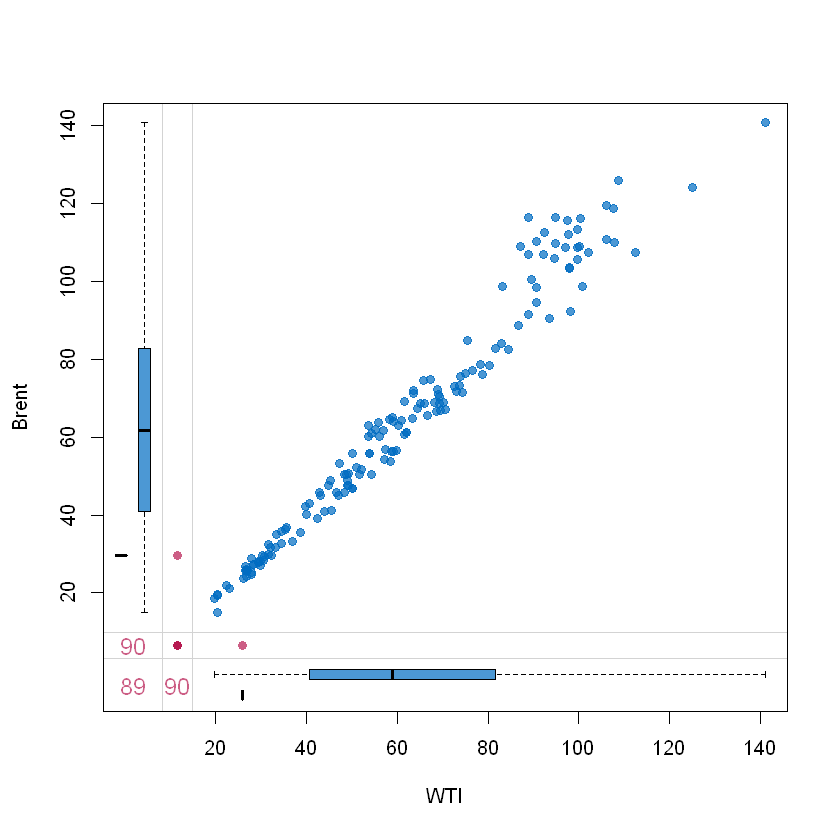

In [8]:
#Drawing margin plot
marginplot(prices[, c("WTI", "Brent")], col = mdc(1:2), cex.numbers = 1.2, pch = 19)

In [9]:
# Imputing missing values
imputes = mice(prices, m=5, maxit = 40)
# methods used for imputing
imputes


 iter imp variable
  1   1  WTI  Brent
  1   2  WTI  Brent
  1   3  WTI  Brent
  1   4  WTI  Brent
  1   5  WTI  Brent
  2   1  WTI  Brent
  2   2  WTI  Brent
  2   3  WTI  Brent
  2   4  WTI  Brent
  2   5  WTI  Brent
  3   1  WTI  Brent
  3   2  WTI  Brent
  3   3  WTI  Brent
  3   4  WTI  Brent
  3   5  WTI  Brent
  4   1  WTI  Brent
  4   2  WTI  Brent
  4   3  WTI  Brent
  4   4  WTI  Brent
  4   5  WTI  Brent
  5   1  WTI  Brent
  5   2  WTI  Brent
  5   3  WTI  Brent
  5   4  WTI  Brent
  5   5  WTI  Brent
  6   1  WTI  Brent
  6   2  WTI  Brent
  6   3  WTI  Brent
  6   4  WTI  Brent
  6   5  WTI  Brent
  7   1  WTI  Brent
  7   2  WTI  Brent
  7   3  WTI  Brent
  7   4  WTI  Brent
  7   5  WTI  Brent
  8   1  WTI  Brent
  8   2  WTI  Brent
  8   3  WTI  Brent
  8   4  WTI  Brent
  8   5  WTI  Brent
  9   1  WTI  Brent
  9   2  WTI  Brent
  9   3  WTI  Brent
  9   4  WTI  Brent
  9   5  WTI  Brent
  10   1  WTI  Brent
  10   2  WTI  Brent
  10   3  WTI  Brent
  10   4  WTI  Br

Class: mids
Number of multiple imputations:  5 
Imputation methods:
    date HenryHub      WTI    Brent 
      ""       ""    "pmm"    "pmm" 
PredictorMatrix:
         date HenryHub WTI Brent
date        0        1   1     1
HenryHub    1        0   1     1
WTI         1        1   0     1
Brent       1        1   1     0

In [10]:
#Imputed dataset
data = complete(imputes,5)
head(data)

date,HenryHub,WTI,Brent
2000-02-01,2.66,28.28,27.35
2000-03-01,2.79,31.71,29.78
2000-04-01,3.04,26.05,27.94
2000-05-01,3.59,25.84,25.24
2000-06-01,4.29,30.19,29.69
2000-07-01,3.99,26.79,26.67


### Goodness of fit

The values are imputed but how good were they? The xyplot() and densityplot() functions come into picture and help us verify our imputations

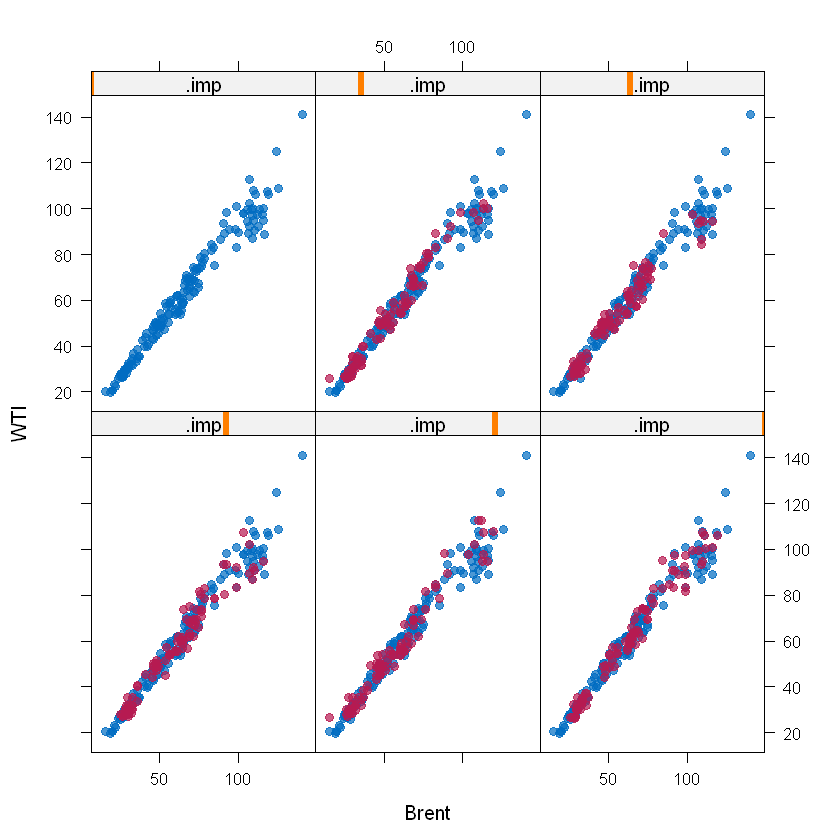

In [11]:
# Plotting and comparing values with xyplot()
xyplot(imputes, WTI ~ Brent | .imp, pch = 20, cex = 1.4)

Here again, the blue ones are the observed data and red ones are imputed data. The red points should ideally be similar to the blue ones so that the imputed values are similar. We can also look at the density plot of the data.

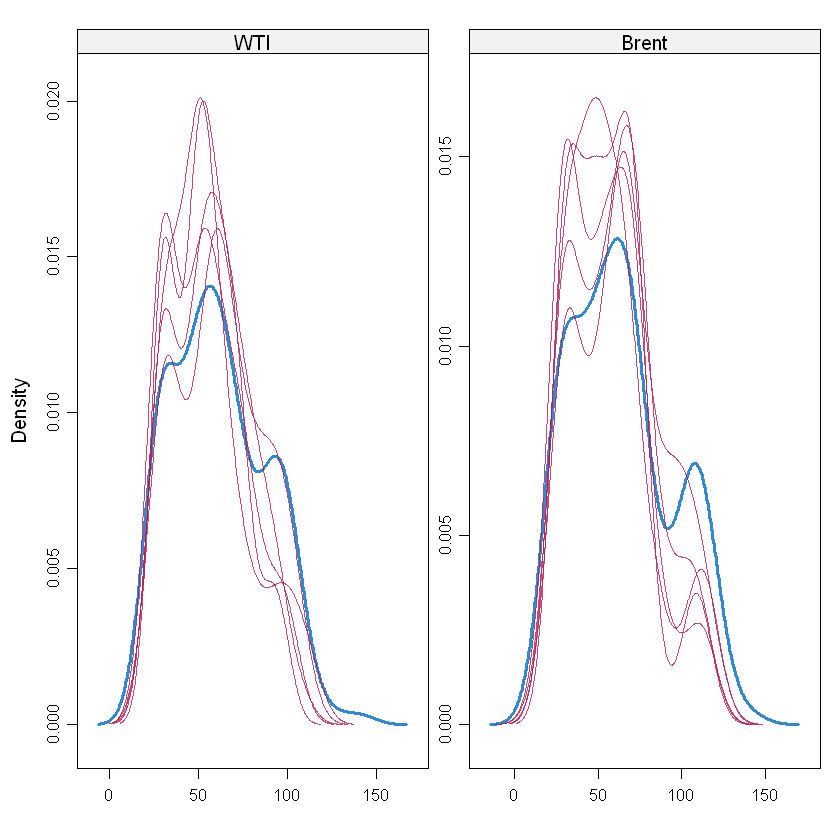

In [12]:
#make a density plot
densityplot(imputes)

the red imputed values should be similar to the blue imputed values for them to be MAR here.

In [13]:
 summary(data)

      date               HenryHub           WTI             Brent       
 Min.   :2000-02-01   Min.   : 1.630   Min.   : 19.72   Min.   : 14.97  
 1st Qu.:2005-03-24   1st Qu.: 2.877   1st Qu.: 40.01   1st Qu.: 39.89  
 Median :2010-05-16   Median : 3.905   Median : 59.48   Median : 63.30  
 Mean   :2010-05-17   Mean   : 4.485   Mean   : 61.56   Mean   : 64.04  
 3rd Qu.:2015-07-08   3rd Qu.: 5.812   3rd Qu.: 81.57   3rd Qu.: 82.64  
 Max.   :2020-09-01   Max.   :13.420   Max.   :141.06   Max.   :140.67  

In [14]:
str(data)

'data.frame':	248 obs. of  4 variables:
 $ date    : Date, format: "2000-02-01" "2000-03-01" ...
 $ HenryHub: num  2.66 2.79 3.04 3.59 4.29 3.99 4.43 5.06 5.02 5.52 ...
 $ WTI     : num  28.3 31.7 26.1 25.8 30.2 ...
 $ Brent   : num  27.4 29.8 27.9 25.2 29.7 ...


In [57]:
# converting to time -series
henryhub = ts(data$HenryHub, start = c(2000,02,01), frequency = 252)
wti = ts(data$WTI, start = c(2000,02,01), frequency = 252)
brent = ts(data$Brent, start = c(2000,02,01), frequency = 252)

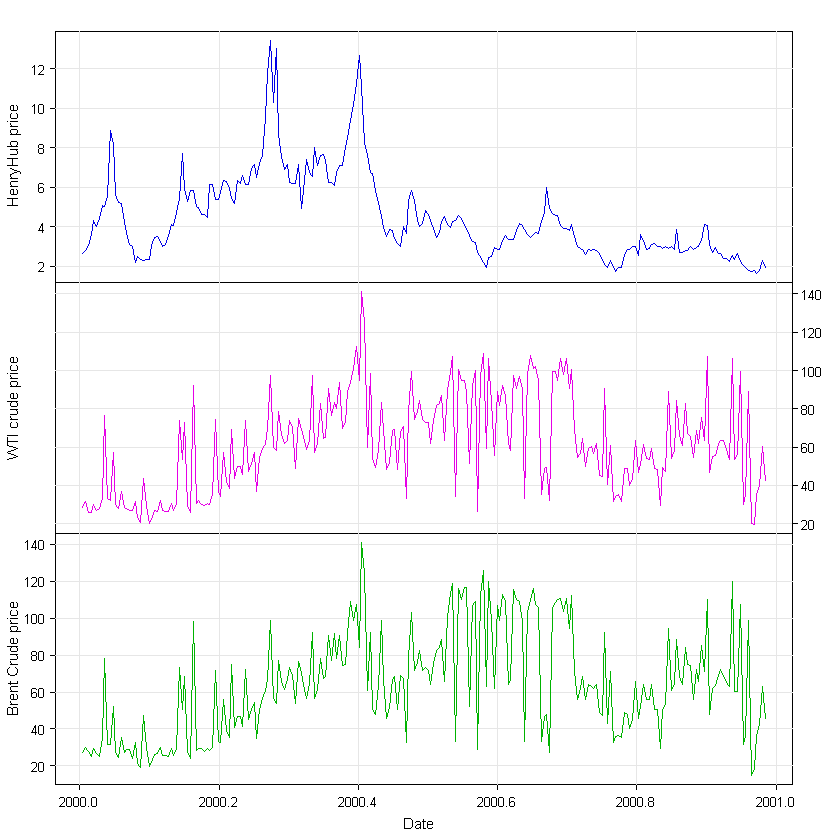

In [58]:
par(mfrow=c(3,1), mar=c(0,3.5,0,3), oma=c(3.5,0,2,0), mgp=c(2,.6,0), cex.lab=1.1, tcl=-.3, las=1)
plot(henryhub, ylab=expression('HenryHub price'), xaxt="no", type='n')
  grid(lty=1, col=gray(.9))
  lines(henryhub, col=rgb(0,0,.9))
   
plot(wti, ylab=expression('WTI crude price'), xaxt="no", yaxt='no', type='n')
  grid(lty=1, col=gray(.9))
  lines(wti, col=rgb(.9,0,.9)) 
  axis(4) 
plot(brent, ylab=expression('Brent Crude price'))
  grid(lty=1, col=gray(.9))
  lines(brent, col=rgb(0,.7,0))
title(xlab="Date", outer=TRUE)

By visual inspection, both series seem to be individually random walks.

### ADF Unit root test


In [16]:
library('urca')

Warning message:
"package 'urca' was built under R version 3.6.3"

Thumb rule: If calculated statistics > tabulated values, null hyposes can be rejected. 

- ADF test (H0: series has unit root)
- PP test (H0: series has unit root)
- KPSS test (H0: series has no unit root)
- Zivot & Andrew test (H0: series has unit root)

In [17]:
library("tseries")
adf.test(log(data[, "HenryHub"]))
adf.test(log(data[, "WTI"]))
adf.test(log(data[, "Brent"]))

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



	Augmented Dickey-Fuller Test

data:  log(data[, "HenryHub"])
Dickey-Fuller = -3.4604, Lag order = 6, p-value = 0.04712
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  log(data[, "WTI"])
Dickey-Fuller = -2.5962, Lag order = 6, p-value = 0.3249
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  log(data[, "Brent"])
Dickey-Fuller = -2.4523, Lag order = 6, p-value = 0.3854
alternative hypothesis: stationary


The stationarity tests indicate that all the series are I(1),

In [18]:
pp.test(log(data[, "HenryHub"]), type = "Z(t_alpha)")
pp.test(log(data[, "WTI"]), type = "Z(t_alpha)")
pp.test(log(data[, "Brent"]), type = "Z(t_alpha)")


	Phillips-Perron Unit Root Test

data:  log(data[, "HenryHub"])
Dickey-Fuller Z(t_alpha) = -3.4877, Truncation lag parameter = 5,
p-value = 0.04449
alternative hypothesis: stationary


Warning message in pp.test(log(data[, "WTI"]), type = "Z(t_alpha)"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  log(data[, "WTI"])
Dickey-Fuller Z(t_alpha) = -9.248, Truncation lag parameter = 5,
p-value = 0.01
alternative hypothesis: stationary


Warning message in pp.test(log(data[, "Brent"]), type = "Z(t_alpha)"):
"p-value smaller than printed p-value"


	Phillips-Perron Unit Root Test

data:  log(data[, "Brent"])
Dickey-Fuller Z(t_alpha) = -9.3893, Truncation lag parameter = 5,
p-value = 0.01
alternative hypothesis: stationary


## Stationarity test

In [19]:
kpss.test(log(data[, "HenryHub"]))
kpss.test(log(data[, "WTI"]))
kpss.test(log(data[, "Brent"]))

Warning message in kpss.test(log(data[, "HenryHub"])):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  log(data[, "HenryHub"])
KPSS Level = 1.899, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(log(data[, "WTI"])):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  log(data[, "WTI"])
KPSS Level = 1.3095, Truncation lag parameter = 5, p-value = 0.01


Warning message in kpss.test(log(data[, "Brent"])):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  log(data[, "Brent"])
KPSS Level = 1.5159, Truncation lag parameter = 5, p-value = 0.01


KPSS test also points to nonstationarity of the price series.

## Cointegration test

Having evidence for nonstationarity, it is of interest to test
for a common nonstationary component by means of a cointegration test. A simple method to test for cointegration is the two-step method proposed by Engle and Granger (1987). It regresses one series on the other and performs
a unit root test on the residuals.

In [59]:
df = cbind(henryhub, wti, brent)
po.test(log(df))

Warning message in po.test(log(df)):
"p-value smaller than printed p-value"


	Phillips-Ouliaris Cointegration Test

data:  log(df)
Phillips-Ouliaris demeaned = -67.899, Truncation lag parameter = 2,
p-value = 0.01


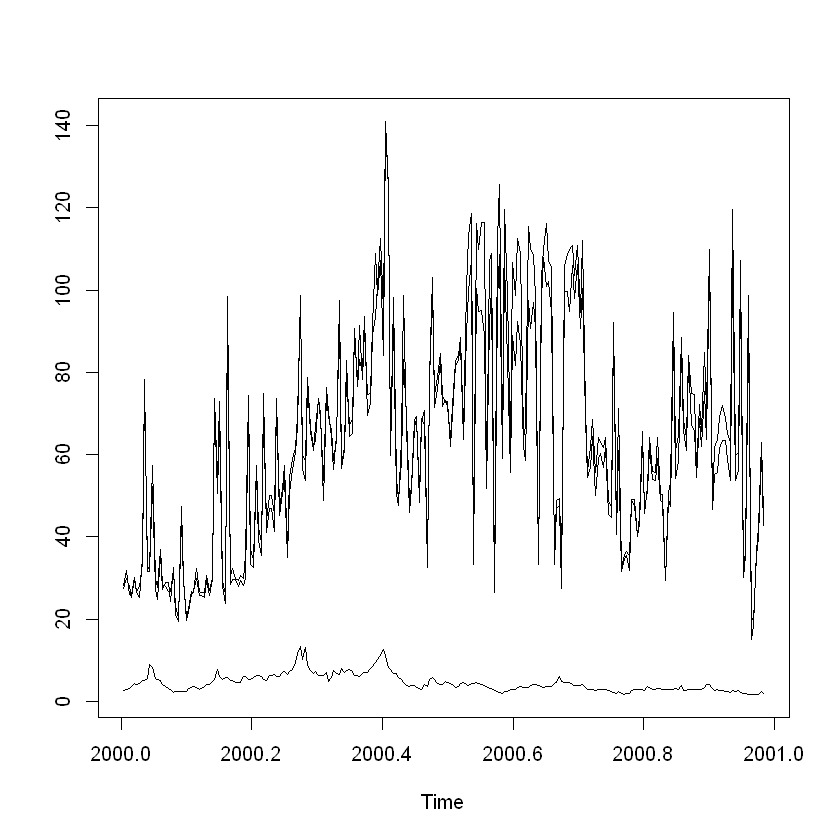

In [61]:
ts.plot(df)

Our test rejects the null of no cointegration, meaning that the series are cointegrated. With cointegrated series we can construct a VEC model to better understand the causal relationship between the variables.

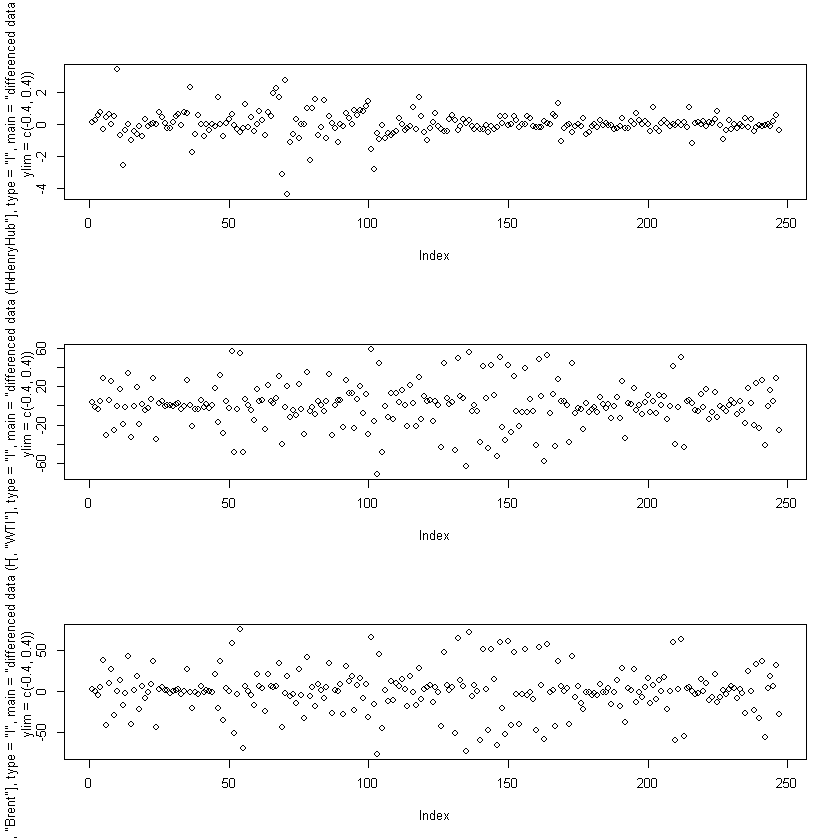

In [22]:
par(mfrow=c(3,1))
plot(diff(data[, "HenryHub"], type='l', main="differenced data (HenryHub)", ylim=c(-0.4, 0.4)))
plot(diff(data[, "WTI"], type='l', main="differenced data (HenryHub)", ylim=c(-0.4, 0.4)))
plot(diff(data[, "Brent"], type='l', main="differenced data (HenryHub)", ylim=c(-0.4, 0.4)))

In [21]:
install.packages('vars')
library(vars)

package 'vars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


Warning message:
"package 'vars' was built under R version 3.6.3"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"
Attaching package: 'strucchange'

The following object is masked from 'package:stringr':

    boundary

Loading required package: lmtest
Warning message:
"package 'lmtest' was built under R version 3.6.3"

#### Determine number of lags to be included in cointegration test and in VEC model


In [22]:
VARselect(log(df), lag.max = 10, type="const")

,1,2,3,4,5,6,7,8,9,10
AIC(n),-1.191455e+01,-1.195418e+01,-1.208738e+01,-1.203677e+01,-1.206986e+01,-1.205608e+01,-1.201783e+01,-1.202240e+01,-1.198340e+01,-1.196751e+01
HQ(n),-1.184399e+01,-1.183071e+01,-1.191098e+01,-1.180745e+01,-1.178763e+01,-1.172094e+01,-1.162977e+01,-1.158142e+01,-1.148950e+01,-1.142069e+01
SC(n),-1.173947e+01,-1.164781e+01,-1.164970e+01,-1.146778e+01,-1.136957e+01,-1.122449e+01,-1.105494e+01,-1.092820e+01,-1.075789e+01,-1.061070e+01
FPE(n),6.692414e-06,6.432588e-06,5.630972e-06,5.924354e-06,5.733146e-06,5.815049e-06,6.045199e-06,6.022144e-06,6.267623e-06,6.375523e-06


According to the AIC and FPE the optimal lag number is p = 5, whereas the HQ criterion
indicates p = 3 and the SC criterion indicates an optimal lag length of p = 1. They estimated
for all three lag orders a VAR including a constant and a trend as deterministic regressors
and conducted diagnostic tests with respect to the residuals.

In [97]:
# Creating a new dataframe with the differenced variables

diff.data = cbind(diff(df))
VARselect(diff.data, lag.max = 10, type="const")

,1,2,3,4,5,6,7,8,9,10
AIC(n),8.653787,8.335180,8.378175,8.303884,8.261757,8.290643,8.274923,8.304027,8.302546,8.336579
HQ(n),8.724565,8.459039,8.555117,8.533909,8.544865,8.626834,8.664197,8.746384,8.797986,8.885101
SC(n),8.829385,8.642476,8.817169,8.874577,8.964149,9.124733,9.240711,9.401515,9.531732,9.697463
FPE(n),5731.869750,4168.164706,4351.713367,4040.866754,3875.282448,3990.521568,3930.534225,4049.669178,4047.570246,4192.703642


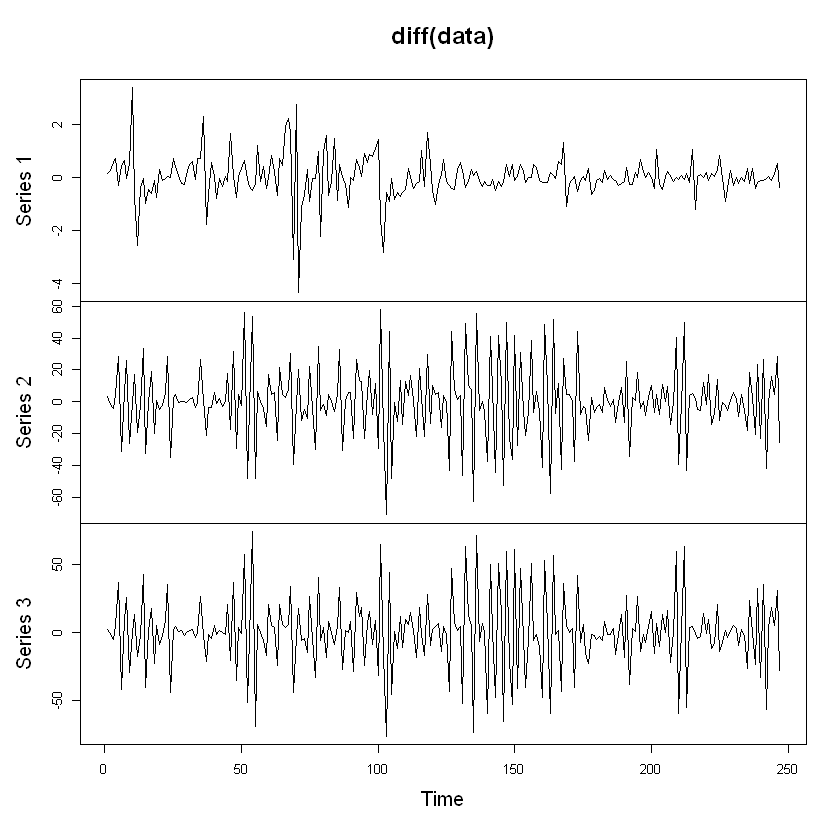

In [68]:
plot.ts(diff.data, main = "diff(data)")

In [100]:
install.packages('egcm')

also installing the dependency 'pracma'



package 'pracma' successfully unpacked and MD5 sums checked
package 'egcm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


In [102]:
library(egcm)
# procedure selects the appropriate values for α, β, and ρ that best fit the following model:
fit_egcm = egcm(diff.data)
summary(fit_egcm)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in egcm(diff.data): If Y is missing, X must be a two-column matrix or data.frame


Here the estimation results show that y1.l1 is the Granger cause
of y2.l1 (in the 2nd model the p-value of y1.l1 is < 0.05) but not
vice versa;  in all other model the p-value is > 0.05) (the
R-squared is also larger in the 1st equation).

In [63]:
#data <- df[, c("HenryHub", "WTI", "Brent")]
var_mod <- VAR(df, p = 3, type = "both")
summary(var_mod)


VAR Estimation Results:
Endogenous variables: henryhub, wti, brent 
Deterministic variables: both 
Sample size: 245 
Log Likelihood: -2012.016 
Roots of the characteristic polynomial:
0.902 0.8221 0.7166 0.6837 0.6837 0.4529 0.4529 0.3309 0.2936
Call:
VAR(y = df, p = 3, type = "both")


Estimation results for equation henryhub: 
henryhub = henryhub.l1 + wti.l1 + brent.l1 + henryhub.l2 + wti.l2 + brent.l2 + henryhub.l3 + wti.l3 + brent.l3 + const + trend 

              Estimate Std. Error t value Pr(>|t|)    
henryhub.l1  0.9222864  0.0655510  14.070  < 2e-16 ***
wti.l1      -0.0011835  0.0143208  -0.083  0.93421    
brent.l1    -0.0012326  0.0125694  -0.098  0.92197    
henryhub.l2  0.0490920  0.0897412   0.547  0.58487    
wti.l2       0.0085102  0.0148313   0.574  0.56665    
brent.l2    -0.0031738  0.0131398  -0.242  0.80935    
henryhub.l3 -0.0830773  0.0688170  -1.207  0.22857    
wti.l3      -0.0016739  0.0142190  -0.118  0.90639    
brent.l3     0.0007253  0.0125317   0.058  0

Warning message in plot.varest(var_mod, names = "HenryHub"):
"
Invalid variable name(s) supplied, using first variable.
"

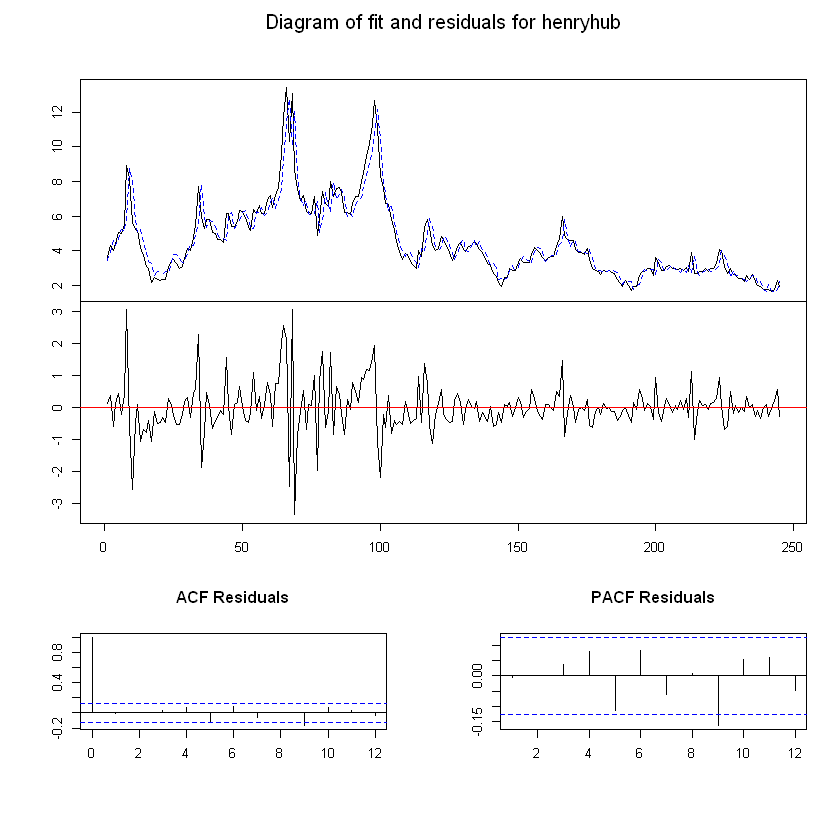

In [66]:
plot(var_mod, names = "HenryHub")

## Model Diagnostics:

### Residuals:
portmanteau goodnessof-fit test to test the adequacy of the fitted model by checking whether the residuals are
approximately white noise

In [67]:
residuals = serial.test(var_mod, lags.pt=3, type="PT.asymptotic") # residuals
residuals$serial


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_mod
Chi-squared = 5.4563, df = 0, p-value < 2.2e-16


The null hypothesis of no autocorrelation is rejected since the p-value < than the significance level of 0.05.

### Normality test:

In [68]:
norm <- normality.test(var_mod)
norm$jb.mul

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_mod
Chi-squared = 246.88, df = 6, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_mod
Chi-squared = 9.9389, df = 3, p-value = 0.01909


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_mod
Chi-squared = 236.94, df = 3, p-value < 2.2e-16



- The null hypothesis of the Jarque-Bera test is a joint hypothesis of the skewness being zero and the excess kurtosis being zero
- The result of the p-value shows the null hypothesis is rejected. 
- Thus, we can conclude residuals does not follow a normal distribution.

Warning message in plot.varcheck(norm, names = "HenryHub"):
"
Invalid residual name(s) supplied, using residuals of first variable.
"

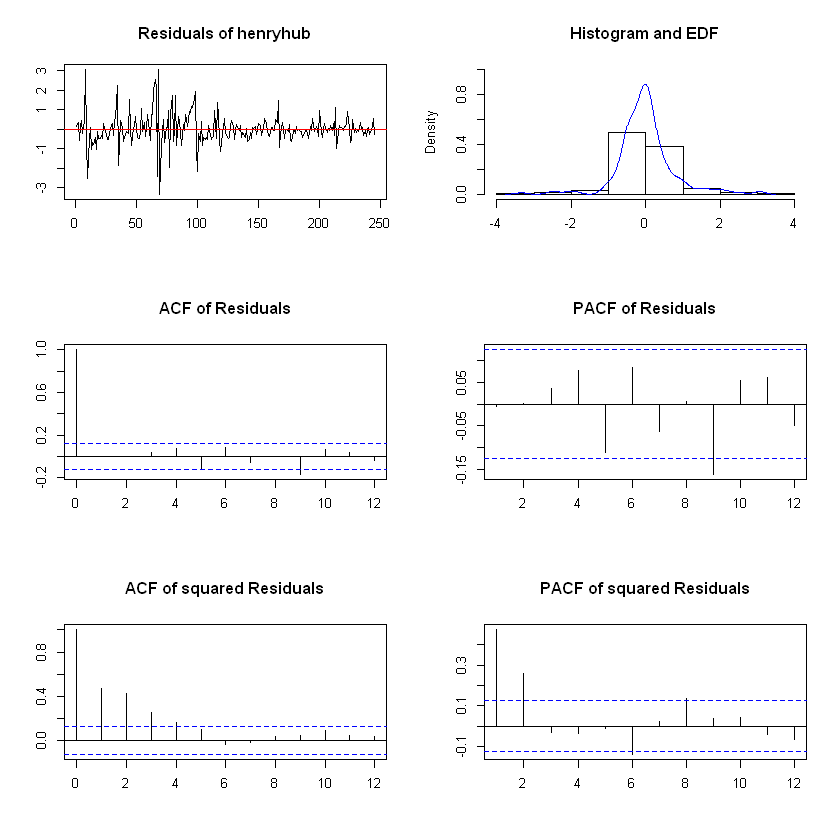

In [69]:
plot(norm, names = "HenryHub")

### Conditional volatility models:

In [70]:
arch <- arch.test(var_mod, lags.multi = 5, multivariate.only = TRUE)
arch$arch.mul


	ARCH (multivariate)

data:  Residuals of VAR object var_mod
Chi-squared = 375.04, df = 180, p-value = 7.772e-16


Here p < 0.05, therefore, so, we can assume that model suffers from hyperscadacity. 

### Testing structural breaks

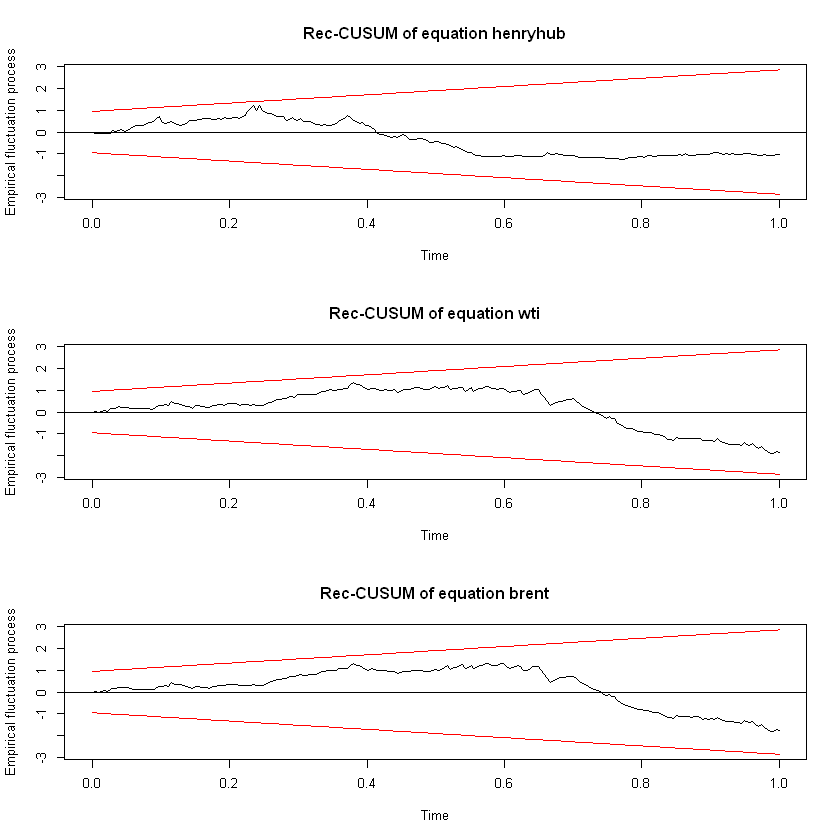

In [71]:
## Stability
plot(stability(var_mod, type = "Rec-CUSUM"))


Here we find the system is stable becuase line plots do not exceed the red lines.

### Granger Causality

In [75]:
causality(var_mod, cause = 'wti')
causality(var_mod, cause = 'brent')
causality(var_mod, cause = 'henryhub')

$Granger

	Granger causality H0: wti do not Granger-cause henryhub brent

data:  VAR object var_mod
F-Test = 1.4459, df1 = 6, df2 = 702, p-value = 0.1944


$Instant

	H0: No instantaneous causality between: wti and henryhub brent

data:  VAR object var_mod
Chi-squared = 120.3, df = 2, p-value < 2.2e-16



$Granger

	Granger causality H0: brent do not Granger-cause henryhub wti

data:  VAR object var_mod
F-Test = 1.1576, df1 = 6, df2 = 702, p-value = 0.3273


$Instant

	H0: No instantaneous causality between: brent and henryhub wti

data:  VAR object var_mod
Chi-squared = 120.29, df = 2, p-value < 2.2e-16



$Granger

	Granger causality H0: henryhub do not Granger-cause wti brent

data:  VAR object var_mod
F-Test = 6.4644, df1 = 6, df2 = 702, p-value = 1.197e-06


$Instant

	H0: No instantaneous causality between: henryhub and wti brent

data:  VAR object var_mod
Chi-squared = 3.9472, df = 2, p-value = 0.139



- WTI does not Granger-cause HenryHub, Brent; p value 0.1944 > 0.05
- Brent does not Granger-cause HenryHub, WTI; p value 0.3273 > 0.05
- HenryHub Granger-cause WTI, Brent; p-value = 1.197e-06 < 0.05

### Impulse response 

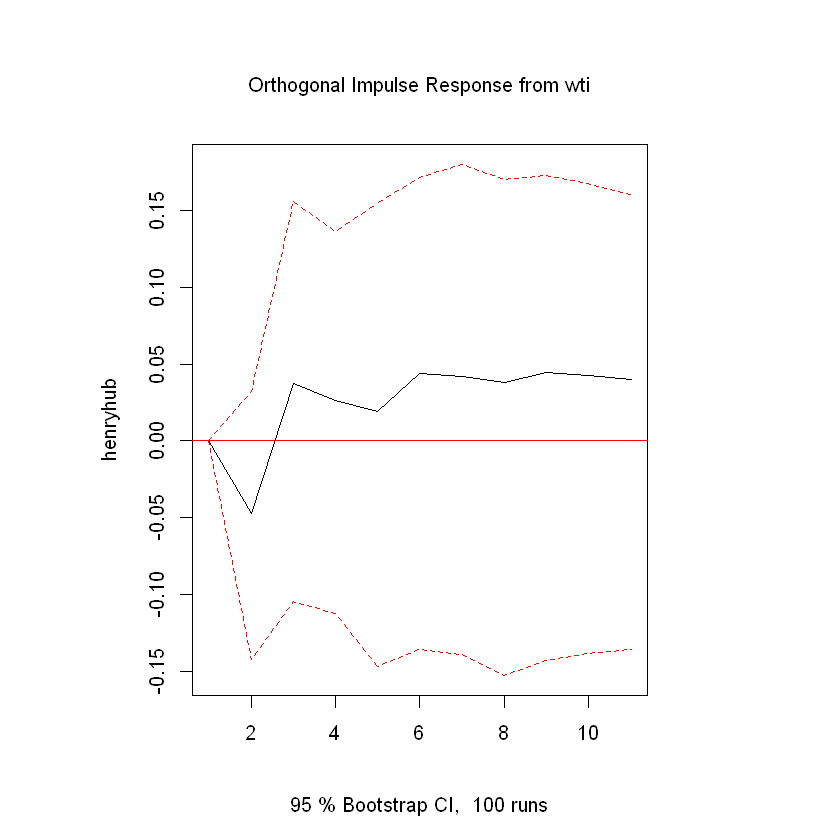

In [77]:
## IRF
plot(irf(var_mod, impulse = "wti", response = c("henryhub"), n_ahead=15, boot = TRUE))

Confidence interval span is quite big indicating we have relatively bigger room for error; so, to effect there could be no effect between WTI & HenryHub; however, on the basis of point estimate, WTI will have positive effect on HenryHub.

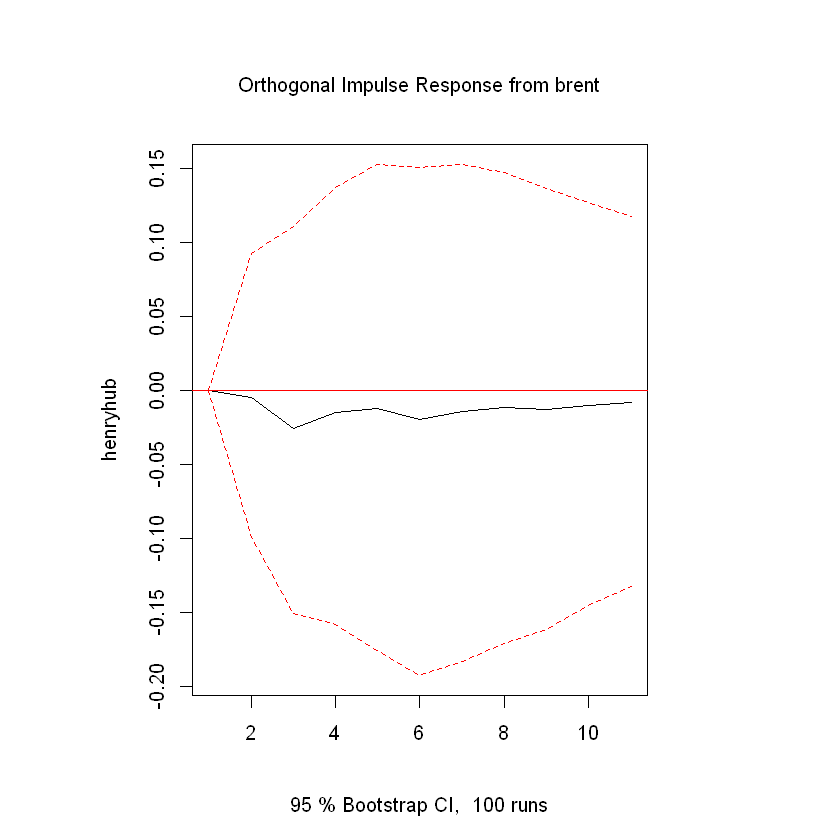

In [78]:
## IRF
plot(irf(var_mod, impulse = "brent", response = c("henryhub"), n_ahead=15, boot = TRUE))

here too, we find there is no impact of Brent on HenryHub; we have a relatively bigger room for error; however, Brent having nagative effect on HenryHub.

### FEVD

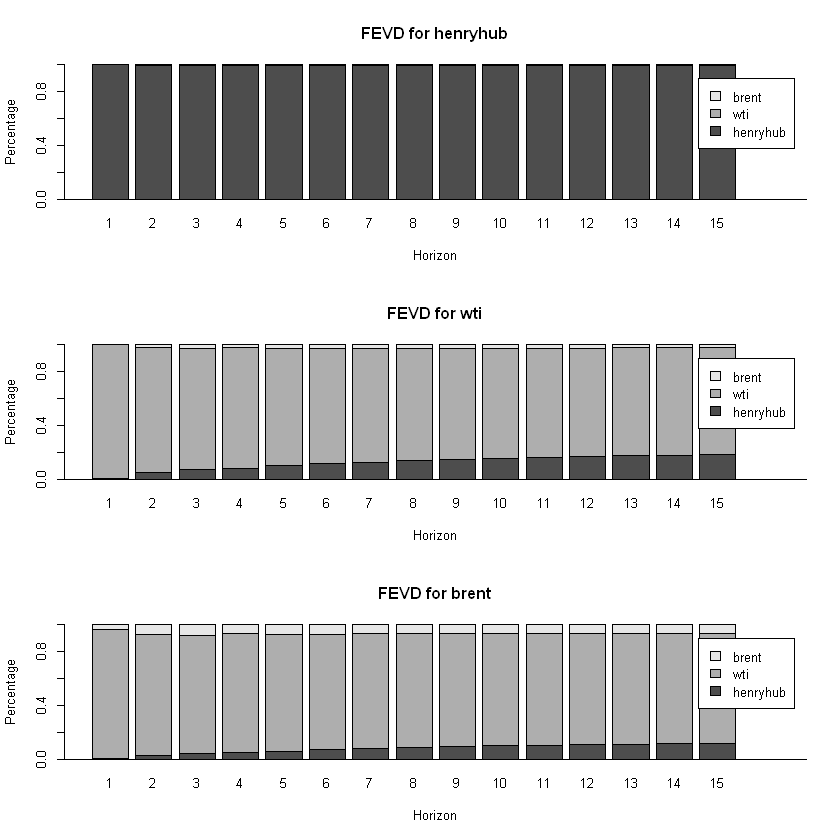

In [79]:
plot(fevd(var_mod, n.ahead = 15))

$henryhub
          fcst      lower    upper       CI
 [1,] 2.023945  0.5085243 3.539366 1.515421
 [2,] 1.918098 -0.1408333 3.977030 2.058932
 [3,] 1.898657 -0.5686141 4.365928 2.467271
 [4,] 1.906046 -0.8471416 4.659233 2.753187
 [5,] 1.877952 -1.0853022 4.841206 2.963254
 [6,] 1.865119 -1.2529830 4.983221 3.118102
 [7,] 1.864559 -1.3717686 5.100886 3.236328
 [8,] 1.851493 -1.4754498 5.178436 3.326943
 [9,] 1.842840 -1.5542984 5.239979 3.397139
[10,] 1.837991 -1.6141955 5.290177 3.452186
[11,] 1.828779 -1.6666943 5.324253 3.495474
[12,] 1.820372 -1.7093403 5.350085 3.529713
[13,] 1.812809 -1.7441342 5.369753 3.556944
[14,] 1.803387 -1.7752512 5.382025 3.578638
[15,] 1.793695 -1.8022861 5.389676 3.595981

$wti
          fcst    lower     upper       CI
 [1,] 51.97508 16.00592  87.94424 35.96916
 [2,] 59.58784 21.67554  97.50014 37.91230
 [3,] 54.99015 16.07322  93.90707 38.91693
 [4,] 58.55736 16.35759 100.75712 42.19976
 [5,] 61.87401 18.56389 105.18414 43.31013
 [6,] 61.00069 16.9640

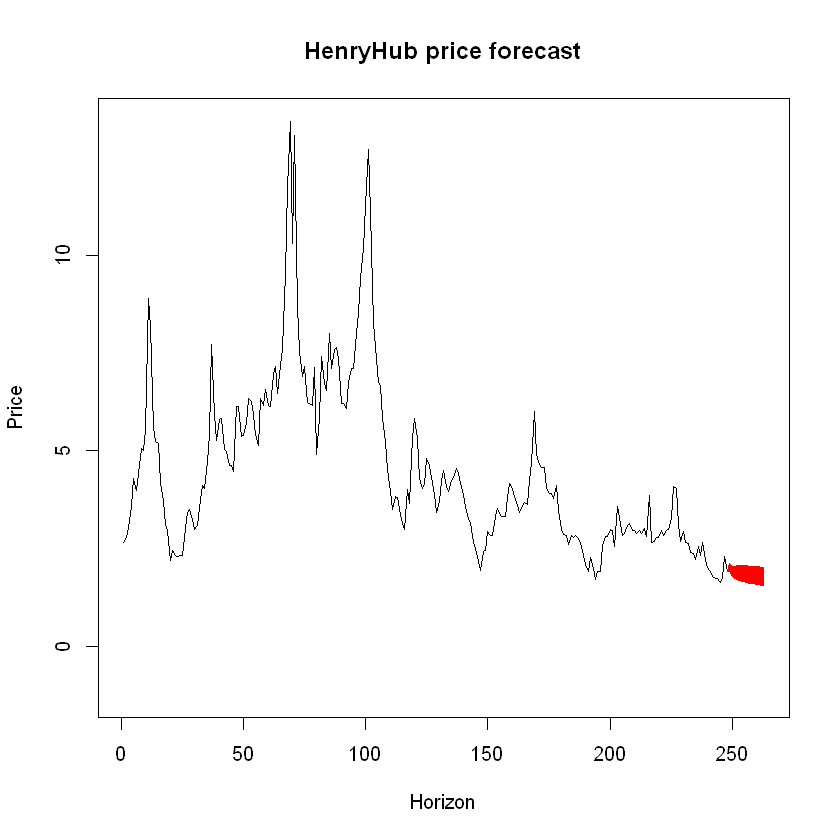

In [103]:
forecast <- predict(var_mod, n.ahead = 15, ci = 0.95)
fanchart(forecast, names = "henryhub", main = "HenryHub price forecast", 
         xlab = "Horizon", ylab = "Price", colors = "red")
forecast

## Cointegration test:
If variables are found to be cointegrated (something which should be investigated using unit root and cointegration tests), then we should work with an error correction model (ECM) involving these variables.

### Conduct eigen test

In [88]:
library(urca)
coin = ca.jo(df, type = "eigen", ecdet = "none", K = 3, spec = "transitory")
summary(coin)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.12310724 0.05612077 0.03222678

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  8.03  6.50  8.18 11.65
r <= 1 | 14.15 12.91 14.90 19.19
r = 0  | 32.19 18.90 21.07 25.75

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            henryhub.l1      wti.l1     brent.l1
henryhub.l1   1.0000000  1.00000000  1.000000000
wti.l1       -0.7789157 -0.94858843  0.008402311
brent.l1      0.6724960  0.05803292 -0.023625046

Weights W:
(This is the loading matrix)

            henryhub.l1      wti.l1    brent.l1
henryhub.d -0.002444656 0.004290066 -0.05996139
wti.d       0.385850853 0.233467332  0.54049420
brent.d    -0.252220780 0.266163009  0.65840636


- r=2 & r=1 : the critical value @ 95% are > test statistics, so we cannot reject H0; meanes our series are cointegrated and they have long run associationships. Hence we can run error correction model.
- r = 0: critical value @95% < test statistic, so we reject H0  
- number of cointegration vector is one here.

### Trace test

In [87]:
coin = ca.jo(df, type = "trace", ecdet = "none", K = 3, spec = "transitory")
# endet = 'none' means there is a linear trend in data
summary(coin)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.12310724 0.05612077 0.03222678

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  8.03  6.50  8.18 11.65
r <= 1 | 22.18 15.66 17.95 23.52
r = 0  | 54.36 28.71 31.52 37.22

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            henryhub.l1      wti.l1     brent.l1
henryhub.l1   1.0000000  1.00000000  1.000000000
wti.l1       -0.7789157 -0.94858843  0.008402311
brent.l1      0.6724960  0.05803292 -0.023625046

Weights W:
(This is the loading matrix)

            henryhub.l1      wti.l1    brent.l1
henryhub.d -0.002444656 0.004290066 -0.05996139
wti.d       0.385850853 0.233467332  0.54049420
brent.d    -0.252220780 0.266163009  0.65840636



	Augmented Dickey-Fuller Test

data:  s
Dickey-Fuller = -3.9344, Lag order = 6, p-value = 0.01283
alternative hypothesis: stationary


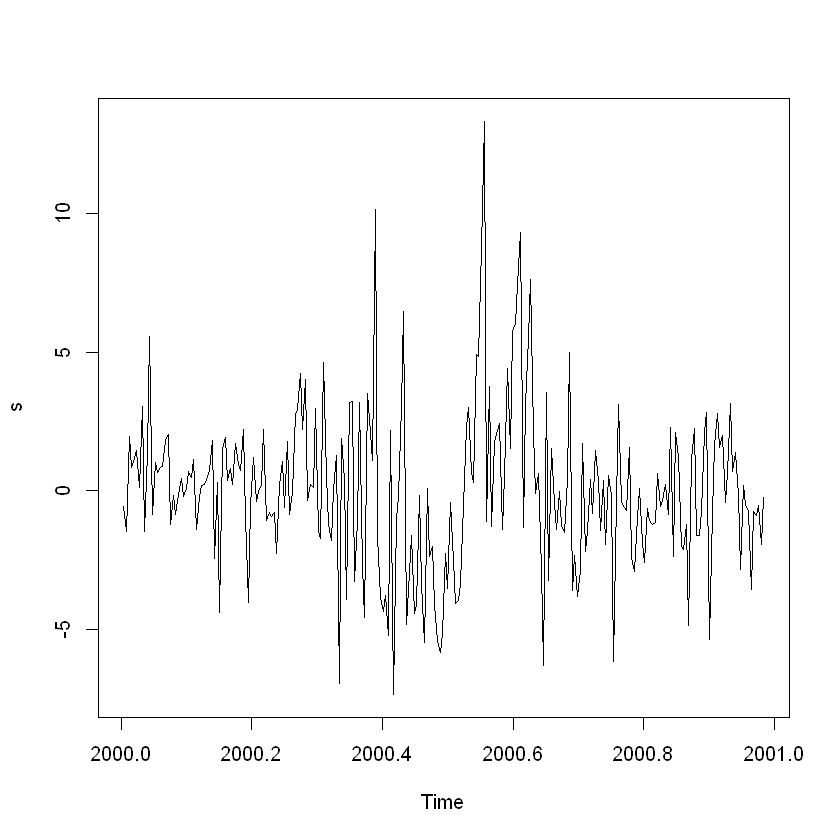

In [91]:
s = 1*henryhub - 0.7788110 * wti + 0.6723858*brent + 0.4075001
plot(s, type ='l')
adf.test(s)

In [90]:
adf.test(s)


	Augmented Dickey-Fuller Test

data:  s
Dickey-Fuller = -3.9344, Lag order = 6, p-value = 0.01283
alternative hypothesis: stationary


## Run VECM

In [86]:
vecm <- cajorls(coin)
vecm
# extract error correction term co-efficient (ECT)

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
              HenryHub.d  WTI.d      Brent.d  
ect1          -0.051017   -0.274618  -1.122149
HenryHub.dl1   0.019273    3.419197   3.574727
WTI.dl1       -0.027572   -1.146463  -0.967859
Brent.dl1      0.022948    0.335891   0.070239
HenryHub.dl2   0.049100    2.705401   3.272801
WTI.dl2       -0.006009   -0.564203  -0.529224
Brent.dl2      0.009657    0.076376  -0.034851


$beta
                  ect1
HenryHub.l1  1.0000000
WTI.l1      -0.6281687
Brent.l1     0.5481853
constant    -1.1117872


In [93]:
install.packages('tsDyn')
library(tsDyn)

package 'tsDyn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpsPJYQW\downloaded_packages


Warning message:
"package 'tsDyn' was built under R version 3.6.3"

In [94]:
model_vecm = VECM(df, lag=3, r=1, estim = 'ML')
summary(model_vecm)

#############
###Model VECM 
#############
Full sample size: 248 	End sample size: 244
Number of variables: 3 	Number of estimated slope parameters 33
AIC 2032.957 	BIC 2155.358 	SSR 196301.3
Cointegrating vector (estimated by ML):
   henryhub        wti     brent
r1        1 -0.8056006 0.6861932


                  ECT                Intercept           henryhub -1        
Equation henryhub 0.0056(0.0252)     -0.0005(0.0586)     -0.0341(0.0697)    
Equation wti      0.6411(0.6071)     0.9615(1.4087)      4.0662(1.6759)*    
Equation brent    0.0620(0.6956)     0.3144(1.6141)      4.1791(1.9202)*    
                  wti -1              brent -1            henryhub -2       
Equation henryhub 0.0031(0.0206)      -0.0039(0.0178)     0.0269(0.0700)    
Equation wti      -1.0253(0.4962)*    0.3054(0.4271)      2.9330(1.6834).   
Equation brent    -0.8660(0.5686)     0.0784(0.4893)      2.9353(1.9288)    
                  wti -2              brent -2            henryhub -3        
Equati

- None of the error correction terms are significant here; we cannot find any short run casuality
- HenryHub is negatively associated with WTI but positively assiciated with Brent
- Lag 1 is significant @ 95% and 90%, so we can infer that there is short run causality on HenryHub from WTI and Brent

In [95]:
# VAR reprecsentation of VECM
VARrep(model_vecm)

,constant,henryhub.l1,wti.l1,brent.l1,henryhub.l2,wti.l2,brent.l2,henryhub.l3,wti.l3,brent.l3,henryhub.l4,wti.l4,brent.l4
henryhub,-0.0004806127,0.9715251,-0.001415281,-7.319949e-05,0.06092865,0.005881203,-0.0006319013,-0.06205003,-0.002984156,0.002376428,0.03518881,-0.005987071,0.002166194
wti,0.9614912589,4.7073087,-0.541764120,7.453706e-01,-1.13314517,0.278697424,-0.0673222273,-2.11727341,0.901514891,-0.398614006,-0.81577444,-0.154931322,0.160494850
brent,0.3144215925,4.2411088,-0.915974879,1.120904e+00,-1.24383218,0.215857487,0.0158534913,-2.07206761,0.816784389,-0.281293110,-0.86320118,-0.166620558,0.187085317


In [110]:
fcast = predict(model_vecm, n.ahead = 15)
fcast

,henryhub,wti,brent
249,2.051539,45.32164,48.27112
250,2.006353,52.23220,55.64675
251,1.950159,45.78249,49.17743
252,1.982784,46.95041,50.39440
253,1.969997,49.37090,53.00246
254,1.942418,47.18312,50.82095
255,1.950695,47.63156,51.29926
256,1.941458,48.50981,52.26203
257,1.927774,47.80119,51.57116
258,1.926214,48.00356,51.79891
